In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDRegressor

In [2]:
pd.set_option('display.max_row', 100)

In [3]:
X=pd.read_csv('train_X.csv')
y=pd.read_csv('train_y.csv')
X_true=pd.read_csv('test_X.csv')
y_example=pd.read_csv('random_sample.csv')


In [4]:
X.shape

(241696, 8)

In [5]:
X.head(50)

,Unnamed: 0,SAMPLE_ID,GROUP_ID,ASSET_ID,MEASURE_TYPE,MEASURE_VALUE,MEASURE_WEEKDAY,MEASURE_WEEK
0,0,1,2,1,1,NaN,1,1
1,1,1,2,1,2,NaN,1,1
2,2,1,2,1,3,19.0,1,1
3,3,1,2,1,4,0.0,1,1
4,4,1,2,1,1,NaN,2,1
5,5,1,2,1,2,NaN,2,1
6,6,1,2,1,3,8.0,2,1
7,7,1,2,1,4,0.0,2,1
8,8,1,2,1,1,NaN,3,1
9,9,1,2,1,2,NaN,3,1


<AxesSubplot:>

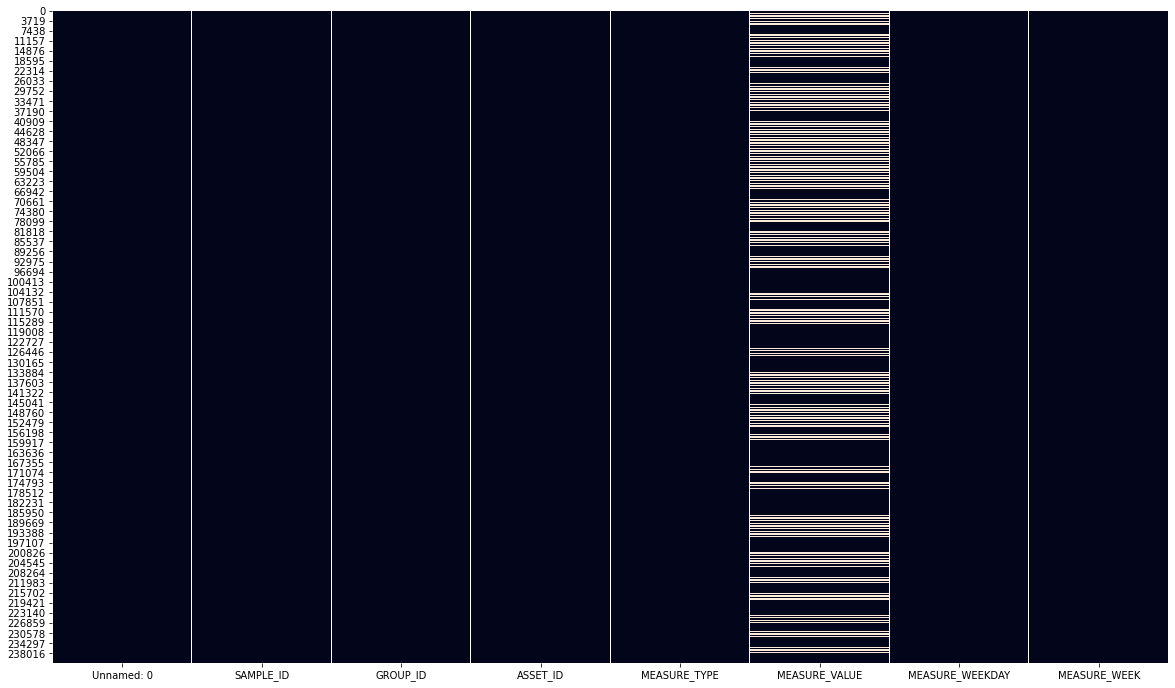

In [6]:
plt.figure(figsize=(20,12))
sns.heatmap(X.isna(),cbar=False)

In [7]:
X.columns

Index(['Unnamed: 0', 'SAMPLE_ID', 'GROUP_ID', 'ASSET_ID', 'MEASURE_TYPE',
       'MEASURE_VALUE', 'MEASURE_WEEKDAY', 'MEASURE_WEEK'],
      dtype='object')

In [8]:
y

,SAMPLE_ID,PRODUCTION_GROUP_2,PRODUCTION_GROUP_3
0,1,3850220.0,9019860.320
1,2,3793240.0,8568867.304
2,3,3870570.0,8549258.912
3,4,3801380.0,8451216.952
4,5,3752540.0,8323762.404
...,...,...,...
99,100,3984530.0,9372811.376
100,101,3976390.0,9588503.688
101,102,3903130.0,9598307.884
102,103,3927550.0,9745370.824


# On sépare les deux groupes d'usines + drop des colonnes redondantes

In [9]:
X=X.drop('SAMPLE_ID',axis=1)


In [10]:
mask=X['GROUP_ID']==2

X_groupe2=X[mask]
X_groupe3=X[~mask]

print(X_groupe2.shape)
print(X_groupe3.shape)

X_groupe2=X_groupe2.drop('GROUP_ID',axis=1)
X_groupe3=X_groupe3.drop('GROUP_ID',axis=1)


(78624, 7)
(163072, 7)


<AxesSubplot:>

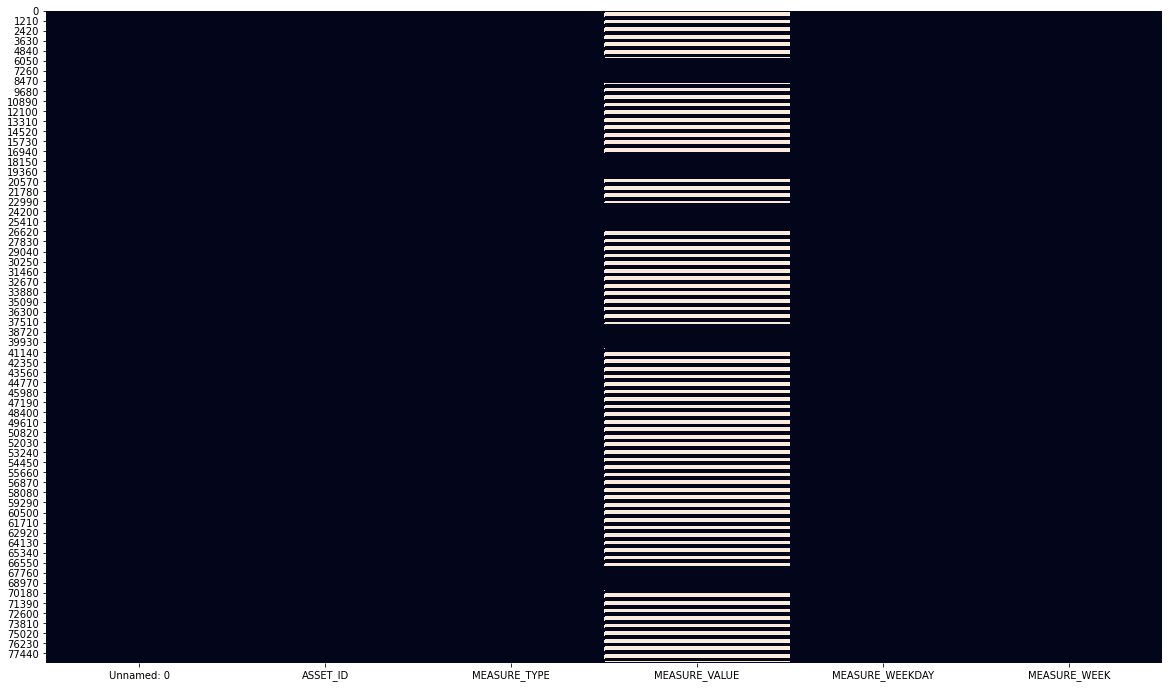

In [11]:
plt.figure(figsize=(20,12))
sns.heatmap(X_groupe2.isna(),cbar=False)

# On supprime les samples inutiles (heures pas connues->nan)

In [12]:
mask=X_groupe2['MEASURE_VALUE']>-1

X_groupe2=X_groupe2[mask]
print(X_groupe2.shape)

X_groupe2['MEASURE_TYPE'].value_counts()

(46592, 6)


3    19656
4    19656
1     3640
2     3640
Name: MEASURE_TYPE, dtype: int64

In [13]:
X_groupe2.head(20)

,Unnamed: 0,ASSET_ID,MEASURE_TYPE,MEASURE_VALUE,MEASURE_WEEKDAY,MEASURE_WEEK
2,2,1,3,19.0,1,1
3,3,1,4,0.0,1,1
6,6,1,3,8.0,2,1
7,7,1,4,0.0,2,1
10,10,1,3,9.0,3,1
11,11,1,4,0.0,3,1
14,14,1,3,6.0,4,1
15,15,1,4,0.0,4,1
18,18,1,3,6.0,5,1
19,19,1,4,2.0,5,1


# Essai de stratégie pour déployer rapidement un modèle : ne tenir compte que des samples 3 (heures de présence tous employés sur l'usine entière) 
rappel : samples 1 ->sur les zones de production 

         samples 2 ->cadres sur les zones de production
         
         sample 3  ->tous les employés de l'usine
         
         sample 4  ->tous les cadres de l'usine


In [14]:
mask=X_groupe2['MEASURE_TYPE']==3
X_groupe2=X_groupe2[mask]
print(X_groupe2.shape)

X_groupe2['MEASURE_TYPE'].value_counts()


(19656, 6)


3    19656
Name: MEASURE_TYPE, dtype: int64

In [15]:
X_groupe2

,Unnamed: 0,ASSET_ID,MEASURE_TYPE,MEASURE_VALUE,MEASURE_WEEKDAY,MEASURE_WEEK
2,2,1,3,19.0,1,1
6,6,1,3,8.0,2,1
10,10,1,3,9.0,3,1
14,14,1,3,6.0,4,1
18,18,1,3,6.0,5,1
...,...,...,...,...,...,...
78606,78606,27,3,0.0,3,104
78610,78610,27,3,0.0,4,104
78614,78614,27,3,0.0,5,104
78618,78618,27,3,0.0,6,104


# On remplit un tableau numpy de 104 semaines * 27 usines avec le total d'heures chaque semaine 


In [16]:
A=np.zeros((104,27))

for i in range(104):
    for j in range(27):
        mask=(X_groupe2['ASSET_ID']==j+1) & (X_groupe2['MEASURE_WEEK']==i+1)
        A[i,j]=X_groupe2['MEASURE_VALUE'][mask].sum()

A

array([[112.,  78., 258., ..., 264., 179.,  42.],
       [267., 103., 303., ..., 278., 266.,  10.],
       [215.,  63., 315., ..., 236., 184.,   4.],
       ...,
       [183.,  97., 359., ..., 283., 653.,   1.],
       [190.,  99., 236., ..., 225., 351.,   1.],
       [155.,  63., 348., ..., 201., 298.,   0.]])

# Courbes pour 3 usines (104 semaines):

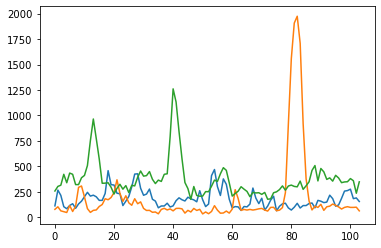

In [17]:
plt.plot(A[:,0:3])

# Pics de  surproduction (incidents-> à effacer)

<AxesSubplot:>

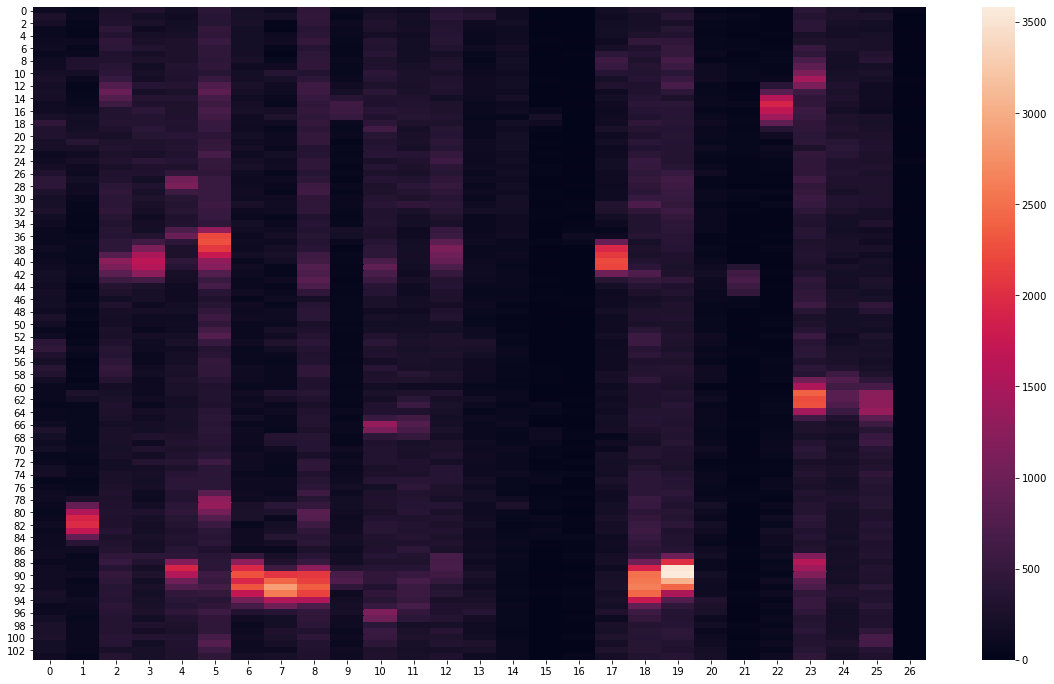

In [18]:
plt.figure(figsize=(20,12))
sns.heatmap(A)